In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

In [52]:
d = loadmat('dataset/resultados_w1000pts.mat')
ptrafo1 = pd.DataFrame(d['Ptrafo1'].transpose().flatten(), columns = ['Ptrafo1'])
ptrafo2 = pd.DataFrame(d['Ptrafo2'].transpose().flatten(), columns = ['Ptrafo2'])


In [53]:
fv = loadmat('dataset/FVcurves1000pts.mat')
fv_12 = pd.DataFrame(fv['FV_w'].flatten(), columns = ['FV_12'])
fv_18 = pd.DataFrame(fv['FV_w'].flatten(), columns = ['FV_18'])
fv_25 = pd.DataFrame(fv['FV_w'].flatten(), columns = ['FV_25'])
fv_29 = (1/47) * pd.DataFrame(fv['FV_w'].flatten(), columns = ['FV_29'])
fv_32 = (1/42) * pd.DataFrame(fv['FV_w'].flatten(), columns = ['FV_32'])

In [54]:
vref1 = np.zeros([144, 1000])
vref2 = np.zeros([144, 1000])
a = 0
b = 25
for i in range(144):
  for j in range(len(d['Tensao'][0])):
    vref1[i][j] = d['Tensao'][a][j]
    vref2[i][j] = d['Tensao'][b][j]
  a = a + 42
  b = b + 42

vref1 = pd.DataFrame(vref1.transpose().flatten(), columns = ['Vref1'])
vref2 = pd.DataFrame(vref2.transpose().flatten(), columns = ['Vref2'])

In [55]:
cargaP = np.zeros([42, 1000, 144])
cargaQ = np.zeros([42, 1000, 144])
p = d['CargaP'].transpose()
q = d['CargaP'].transpose()

for i in range(42):
  for j in range(1000):
    a = i
    for k in range(144):
      cargaP[i][j][k] = p[j][a]
      cargaQ[i][j][k] = q[j][a]
      a = a + 42

avgP = cargaP.mean(axis=1)
avgQ = cargaQ.mean(axis=1)

avgP = pd.DataFrame(avgP.transpose())
avgP  = pd.concat([avgP]*1000, ignore_index=True)
avgP.columns = [f'P{col_name}' for col_name in avgP.columns]
avgP = avgP.drop(['P0','P25'], axis=1)

avgQ = pd.DataFrame(avgQ.transpose())
avgQ  = pd.concat([avgQ]*1000, ignore_index=True)
avgQ.columns = [f'Q{col_name}' for col_name in avgQ.columns]
avgQ = avgQ.drop(['Q0','Q25'], axis=1)

cargaP = pd.DataFrame(cargaP.reshape(42,144000).transpose())
cargaP.columns = [f'P{col_name}' for col_name in cargaP.columns]
cargaP = cargaP.drop(['P0','P25'], axis=1)

cargaQ = pd.DataFrame(cargaQ.reshape(42,144000).transpose())
cargaQ.columns = [f'Q{col_name}' for col_name in cargaQ.columns]
cargaQ = cargaQ.drop(['Q0','Q25'], axis=1)

cargaP



,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41
0,0.009734,0.009834,0.012679,0.006414,0.005711,0.019901,0.020760,0.005586,0.005986,0.004578,...,0.000216,0.000265,0.005832,0.005882,0.006341,0.011216,0.020954,0.015683,0.021967,0.006054
1,0.008489,0.007609,0.011114,0.005427,0.005834,0.017792,0.018026,0.005269,0.005269,0.004023,...,0.000207,0.000234,0.005177,0.005416,0.005216,0.010498,0.017240,0.012633,0.018994,0.005212
2,0.008479,0.007208,0.011379,0.005166,0.005292,0.017040,0.016047,0.005139,0.005601,0.004228,...,0.000199,0.000231,0.005106,0.005556,0.005428,0.010461,0.018653,0.012739,0.018057,0.005326
3,0.008244,0.007869,0.009901,0.005009,0.004862,0.017293,0.016025,0.005315,0.004515,0.003550,...,0.000176,0.000234,0.004657,0.005174,0.004779,0.010133,0.016994,0.013142,0.016360,0.005020
4,0.007704,0.007068,0.010562,0.004872,0.004785,0.016108,0.016280,0.004854,0.004915,0.004148,...,0.000193,0.000227,0.005117,0.005032,0.004702,0.010507,0.016470,0.012441,0.018189,0.005102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143995,0.025086,0.023784,0.028559,0.014306,0.014914,0.050059,0.051772,0.015628,0.014343,0.012109,...,0.000572,0.000698,0.015604,0.015474,0.017490,0.028037,0.049220,0.034343,0.057983,0.015990
143996,0.020649,0.020129,0.028740,0.013905,0.012886,0.046503,0.046473,0.012015,0.013255,0.008957,...,0.000447,0.000611,0.013078,0.012686,0.012914,0.025388,0.043782,0.033284,0.046765,0.012852
143997,0.023419,0.021639,0.027228,0.013467,0.015262,0.050713,0.050593,0.014626,0.014748,0.011618,...,0.000494,0.000631,0.013512,0.013954,0.014343,0.027805,0.048484,0.037782,0.048746,0.014248
143998,0.016391,0.013969,0.019271,0.010247,0.009601,0.034645,0.032181,0.009958,0.009039,0.007356,...,0.000389,0.000410,0.009907,0.010678,0.008767,0.017730,0.036404,0.023869,0.037465,0.009715


In [56]:
X = pd.concat([vref1, vref2, fv_12, fv_18, fv_25, fv_29, fv_32, ptrafo1, ptrafo2, cargaP, cargaQ], axis=1)
X = X.iloc[1440:,:]

X2 = pd.concat([vref1, vref2, fv_12, fv_18, fv_25, fv_29, fv_32, ptrafo1, ptrafo2, avgP, avgQ], axis=1)
X2 = X2.iloc[:1440,:]

X2

,Vref1,Vref2,FV_12,FV_18,FV_25,FV_29,FV_32,Ptrafo1,Ptrafo2,P1,...,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41
0,1.05,1.048146,0.0,0.0,0.0,0.0,0.0,0.334064,0.094185,0.009999,...,0.000230,0.000260,0.005989,0.006006,0.005998,0.012049,0.019997,0.015046,0.020949,0.005997
1,1.05,1.048350,0.0,0.0,0.0,0.0,0.0,0.294347,0.080567,0.009033,...,0.000208,0.000234,0.005413,0.005424,0.005428,0.010870,0.018139,0.013565,0.018974,0.005449
2,1.05,1.048351,0.0,0.0,0.0,0.0,0.0,0.290302,0.081519,0.008707,...,0.000202,0.000227,0.005249,0.005244,0.005241,0.010523,0.017498,0.013131,0.018323,0.005234
3,1.05,1.048401,0.0,0.0,0.0,0.0,0.0,0.278100,0.076426,0.008390,...,0.000193,0.000217,0.005019,0.005024,0.005029,0.010057,0.016713,0.012578,0.017605,0.005023
4,1.05,1.048478,0.0,0.0,0.0,0.0,0.0,0.273466,0.077728,0.008314,...,0.000192,0.000216,0.005005,0.004976,0.004998,0.010011,0.016629,0.012487,0.017459,0.005000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1.05,1.045165,0.0,0.0,0.0,0.0,0.0,0.858627,0.238608,0.025662,...,0.000590,0.000665,0.015359,0.015389,0.015382,0.030765,0.051173,0.038442,0.053803,0.015359
1436,1.05,1.045972,0.0,0.0,0.0,0.0,0.0,0.719474,0.191735,0.021812,...,0.000502,0.000568,0.013079,0.013118,0.013056,0.026205,0.043751,0.032788,0.045831,0.013085
1437,1.05,1.045534,0.0,0.0,0.0,0.0,0.0,0.788478,0.221365,0.023559,...,0.000542,0.000614,0.014162,0.014085,0.014150,0.028304,0.047045,0.035382,0.049493,0.014100
1438,1.05,1.046912,0.0,0.0,0.0,0.0,0.0,0.545612,0.150283,0.016362,...,0.000377,0.000426,0.009832,0.009844,0.009838,0.019703,0.032771,0.024544,0.034471,0.009826


In [57]:
tensao = np.zeros([42, 1000, 144])
t = d['Tensao'].transpose()

for i in range(42):
  for j in range(1000):
    a = i
    for k in range(144):
      tensao[i][j][k] = t[j][a]
      a = a + 42

tensao = pd.DataFrame(tensao.reshape(42,144000).transpose())
Y = tensao.drop([0,25], axis=1)
Y2 = Y.iloc[:1440,:]
Y = Y.iloc[1440:,:]
Y


,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
1440,1.049755,1.048616,1.047947,1.047283,1.045627,1.045314,1.044880,1.044323,1.043802,1.043725,...,1.046349,1.046316,1.045454,1.045224,1.044192,1.043449,1.043130,1.042769,1.042688,1.042664
1441,1.049777,1.048740,1.048125,1.047518,1.046005,1.045721,1.045326,1.044824,1.044359,1.044291,...,1.046814,1.046785,1.045846,1.045636,1.044691,1.044009,1.043713,1.043382,1.043307,1.043285
1442,1.049789,1.048807,1.048222,1.047644,1.046209,1.045932,1.045553,1.045077,1.044635,1.044570,...,1.046853,1.046822,1.046062,1.045868,1.045000,1.044380,1.044114,1.043812,1.043746,1.043726
1443,1.049798,1.048855,1.048297,1.047747,1.046378,1.046122,1.045769,1.045311,1.044888,1.044826,...,1.047060,1.047032,1.046233,1.046041,1.045180,1.044563,1.044299,1.044003,1.043941,1.043921
1444,1.049797,1.048853,1.048296,1.047747,1.046377,1.046126,1.045775,1.045324,1.044907,1.044844,...,1.046995,1.046967,1.046231,1.046036,1.045164,1.044536,1.044267,1.043964,1.043897,1.043877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143995,1.049380,1.046493,1.044786,1.043096,1.038897,1.038091,1.036963,1.035509,1.034161,1.033960,...,1.040947,1.040853,1.038462,1.037885,1.035321,1.033494,1.032695,1.031740,1.031518,1.031450
143996,1.049464,1.046952,1.045459,1.043993,1.040356,1.039656,1.038691,1.037464,1.036318,1.036148,...,1.042061,1.041979,1.039981,1.039483,1.037257,1.035658,1.034962,1.034147,1.033968,1.033914
143997,1.049418,1.046700,1.045085,1.043486,1.039506,1.038744,1.037694,1.036361,1.035128,1.034946,...,1.041565,1.041480,1.039095,1.038548,1.036102,1.034345,1.033582,1.032695,1.032506,1.032446
143998,1.049599,1.047733,1.046619,1.045518,1.042773,1.042266,1.041571,1.040676,1.039849,1.039726,...,1.044188,1.044133,1.042481,1.042093,1.040354,1.039097,1.038544,1.037923,1.037782,1.037741


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(99792, 89)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [61]:
model = Sequential()

model.add(Dense(89,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(40))

model.compile(optimizer='adam',loss='mae')

### Training

In [62]:
history = model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=50)

Epoch 1/50
780/780 [==============================] - 2s 2ms/step - loss: 0.0464 - val_loss: 0.0050
Epoch 2/50
780/780 [==============================] - 2s 2ms/step - loss: 0.0053 - val_loss: 0.0059
Epoch 3/50
780/780 [==============================] - 1s 2ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 4/50
780/780 [==============================] - 1s 2ms/step - loss: 0.0051 - val_loss: 0.0031
Epoch 5/50
780/780 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 6/50
780/780 [==============================] - 1s 2ms/step - loss: 0.0048 - val_loss: 0.0031
Epoch 7/50
780/780 [==============================] - 2s 2ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 8/50
780/780 [==============================] - 1s 2ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 9/50
780/780 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0063
Epoch 10/50
780/780 [==============================] - 1s 2ms/step - loss: 0.0044 - val_loss: 0.0036

In [63]:
mae = model.evaluate(X_test, y_test, verbose=0)
print('>%.3f' % mae)

>0.004


### Losses

<AxesSubplot:>

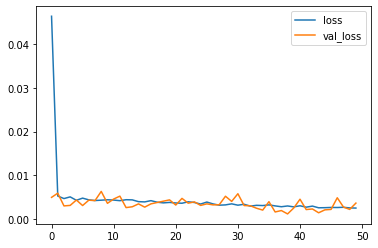

In [64]:
losses = pd.DataFrame(history.history)
losses.plot()

### Evaluation on Test Data

In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
X2.drop(['Vref1', 'Vref2', 'FV_12', 'FV_18', 'FV_25', 'FV_29', 'FV_32', 'Ptrafo1', 'Ptrafo2'], axis = 1)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41
0,0.009999,0.009004,0.012044,0.006013,0.006007,0.019943,0.020042,0.006000,0.006018,0.004500,...,0.000230,0.000260,0.005989,0.006006,0.005998,0.012049,0.019997,0.015046,0.020949,0.005997
1,0.009033,0.008129,0.010878,0.005440,0.005433,0.018083,0.018098,0.005427,0.005412,0.004073,...,0.000208,0.000234,0.005413,0.005424,0.005428,0.010870,0.018139,0.013565,0.018974,0.005449
2,0.008707,0.007858,0.010507,0.005245,0.005252,0.017531,0.017467,0.005236,0.005253,0.003928,...,0.000202,0.000227,0.005249,0.005244,0.005241,0.010523,0.017498,0.013131,0.018323,0.005234
3,0.008390,0.007542,0.010047,0.005029,0.005031,0.016769,0.016727,0.005040,0.005021,0.003775,...,0.000193,0.000217,0.005019,0.005024,0.005029,0.010057,0.016713,0.012578,0.017605,0.005023
4,0.008314,0.007492,0.009987,0.004987,0.004987,0.016675,0.016620,0.004991,0.005000,0.003758,...,0.000192,0.000216,0.005005,0.004976,0.004998,0.010011,0.016629,0.012487,0.017459,0.005000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.025662,0.023061,0.030676,0.015383,0.015364,0.051277,0.051073,0.015373,0.015371,0.011554,...,0.000590,0.000665,0.015359,0.015389,0.015382,0.030765,0.051173,0.038442,0.053803,0.015359
1436,0.021812,0.019625,0.026139,0.013067,0.013103,0.043651,0.043644,0.013084,0.013089,0.009827,...,0.000502,0.000568,0.013079,0.013118,0.013056,0.026205,0.043751,0.032788,0.045831,0.013085
1437,0.023559,0.021245,0.028270,0.014115,0.014158,0.047139,0.047175,0.014155,0.014127,0.010596,...,0.000542,0.000614,0.014162,0.014085,0.014150,0.028304,0.047045,0.035382,0.049493,0.014100
1438,0.016362,0.014791,0.019742,0.009831,0.009848,0.032701,0.032763,0.009809,0.009832,0.007369,...,0.000377,0.000426,0.009832,0.009844,0.009838,0.019703,0.032771,0.024544,0.034471,0.009826


In [66]:
predictions = model.predict(X2)

print(f"Mean Absolute Error: {mean_absolute_error(Y2,predictions)}")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(Y2,predictions))}")


Mean Absolute Error: 0.11364283684527283
Mean Squared Error: 0.13292386098054784


In [67]:
print(Y2.shape,type(Y2))
print(np.shape(Y2[10][0:144]))
print(predictions.shape, type(predictions))
print(np.shape(predictions[: , 10]))

(1440, 40) <class 'pandas.core.frame.DataFrame'>
(144,)
(1440, 40) <class 'numpy.ndarray'>
(1440,)


In [68]:
(Y2[10][(0*144):((0*144)+144)].values == Y2[10][(3*144):((3*144)+144)].values)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [71]:
t = np.arange(144)
i=4
bar = 9
plt.figure(figsize = (13,4.5), dpi = 300)
plt.plot(t,predictions[(i*144):((i*144)+144), bar], 'y', label = 'Predictions')
plt.plot(t,Y2[bar][(i*144):((i*144)+144)], 'r', label = 'Dataset')
plt.show
plt.legend(loc='upper right', prop={'size': 10}, framealpha=1)
plt.savefig(f"Voltage Bar{bar}.jpg")
plt.close()
